<font color = 'purple'>E-Gov-Analytics - Feito por Elvis</font>

# <font color = 'blue'> Data Science Academy<font>
    
# <font color = 'blue'>E-Gov-Analytics<font>

## <font color = 'blue'>Projeto<font>

## <font color = 'blue'>Como Aumento do PIB e Gastos do Governo Impactam os Setores de Saúde e Educação<font>

![title](imagens/projeto.png)

# Instalando e Carregando os dados

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
# Versões ods pacotes usados Neste Jupyter Notebook
%reload_ext watermark
%watermark -a "Elvis" --iversions

Author: Elvis

seaborn   : 0.11.2
numpy     : 1.20.3
pandas    : 1.3.4
matplotlib: 3.4.3
sklearn   : 0.24.2



# Carregando e Compreendendo os Dados

In [4]:
# Carrega o dataset
dados_egov = pd.read_excel('dados/dataset.xlsx')

In [5]:
# Visualiza o formato - Shape - Linhas e Colunas
dados_egov.shape

(17, 16)

In [6]:
# Visualiza os dados - os primeiros da tabela
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


# Análise Exploratória 

In [7]:
# Tipos de dados
dados_egov.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [8]:
# Resumo estatístico 
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [9]:
# Verificando se há valores ausentes
dados_egov.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

# Limpeza e Processamento dos Dados
O que fazer nesta etapa ?

### Tratamento de Valores Ausentes com Backfilling e Interpolação

In [10]:
# Limpeza valores  ausentes através de backfilling e interpolação
# inplace = True - Ele vai gravar no dataframe

dados_egov['receita_trib_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov['receita_excl_doa_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov = dados_egov.interpolate()

_Justificativa das minhas decisões acima, com base na minha experiência e compreensão do negócio_

Como nas colunas **receita_trib_%pib** e coluna **receita_excl_doa_%pib**, há diversos campos em brancos, eu preciso aplicar uma maneira para resolver este problema.

    - 1 - Não posso apagar as linhas em branco, pois há muitas linhas e isso reduzirá drasticamente meu dataset 
    - 2 - Outro opção é nessas duas colunas é aplicar o metodo bfill que preenche esses campos/linhas em branco e aplico o inplace = True para salvar no dataframe, ou seja para eu lá no final salvar um novo arquivo já com essas alterações feitas ao invés de salvar apenas em memória durante o processo de limpeza e tratamento dos dados
    
Paras as demais colunas, onde a quantidade de campos em branco é pequena, eu irei aplicar a interpolação.

    - 1 - Interpolação, ou seja, calcular a média dos valores e preencher os valores ausentes 

In [11]:
# Verificar os valores Ausentes
dados_egov.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [12]:
# O formato do dataframe - Linhas e Colunas
dados_egov.shape

(17, 16)

In [13]:
# Vamos remover a coluna gdp em US$ uma vez que já temos na moeda local.
dados_egov = dados_egov.drop(columns = ['pib_cor_us$'])

In [14]:
# Visualiza o formato pra ver se apagaou a coluna
dados_egov.shape

(17, 15)

In [15]:
# Arredondamos os valores das colunas decimais para 4 casas decimais
dados_egov = dados_egov.round(4)

Padronizar os valores, para 4 casas decimais, para facilitar a criação dos gráficos, facilitar os cálculos. Caso senha necessário trabalhar com a precisão máxima é só não arredondar as casas decimais 

In [16]:
# Visualiza os dados 
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [17]:
# Salvar o dataset limpo
dados_egov.to_csv('dados/dataset_limpo.csv', index = False)

# Análise de Dados

In [18]:
# Carregando o dataset limpo
df = pd.read_csv('dados/dataset_limpo.csv')

## <font color = 'red'> 1- Em Que Ano o País Teve um Alto Crescimento do PIB Per Capita ?<font>

In [19]:
# Visualiza os primeiros dados 
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [20]:
# Em formato de tabela

# Encontrar o índice do ano com maior crescimento do PIB per capita
indice_alto_crescimento_pib = df['pib_cresc_per_capita_%pib'].idxmax()

# Ano com alto crescimento do PIB per capita
ano_alto_crescimento_pib = df.loc[indice_alto_crescimento_pib, 'ano_coleta']
valor_crescimento = df.loc[indice_alto_crescimento_pib, 'pib_cresc_per_capita_%pib']

# Criar uma tabela para visualização
tabela_alto_crescimento = df[df['ano_coleta'] == ano_alto_crescimento_pib][['ano_coleta', 'pib_cresc_per_capita_%pib']]

tabela_alto_crescimento

,ano_coleta,pib_cresc_per_capita_%pib
7,2010,5.4941


<AxesSubplot:xlabel='ano_coleta'>

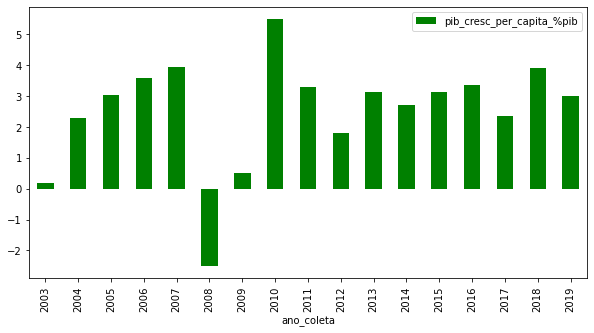

In [21]:
# Gerando um gráfico para vizualizar
df.plot(x = "ano_coleta", y = ["pib_cresc_per_capita_%pib"], kind = "bar", figsize = (10,5), color = 'green')

Ao analisar o gráfico se nota que o ano de 2010 apresentou o maior ano de crescimento do PIB, e no ano de 2008 uma queda drástica do PIB, de fato houve uma grande crise financeira mundial neste ano.

Dados complementares: https://www.politize.com.br/crise-financeira-de-2008/

## <font color = "red">2- Qual Ano Teve as Maiores Despesas com Saúde?</font>

In [30]:
# Visualiza os dados 
df.head(3)

In [35]:
# Calculando o gasto nacional bruto em relação ao PIB na moeda local
df['gasto_nac_bruto'] = df["despesa_nac_bruta_%pib"] / 100 * df["pib_moeda_local"]
df.head(3)

In [32]:
# Calculando o gasto total em saúde e criando uma nova variável
df["gasto_saude_gov"] = df["domestic_saude_despesas_%pib"] / 100 * df["gasto_nac_bruto"]
df.head(3)

In [27]:
# Gerando um gráfico para vizualizar
df.plot(x = "ano_coleta", y = ["gasto_saude_gov"], kind = "bar", figsize = (10,5), color = 'goldenrod')

## <font color = "blue">3- Qual Ano Teve os Maiores Gastos com Educação?</font>

In [33]:
# Visualiza os dados
df.head()

In [41]:
# Calculando o gasto totla em saúde e criando uma nova variável 
df["gasto_educacao_gov"] = df["despesas_educ_total"] / 100 * df["gasto_nac_bruto"]

<AxesSubplot:xlabel='ano_coleta'>

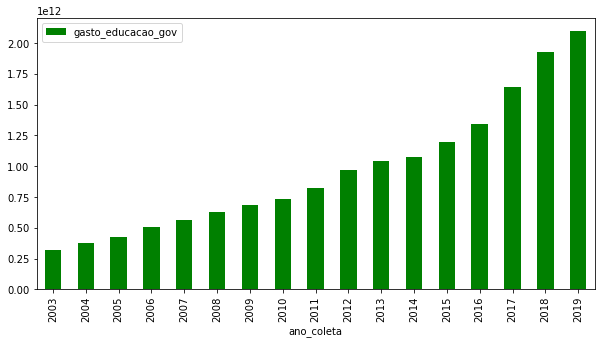

In [43]:
# Gerando o gráfico
df.plot(x = "ano_coleta", y = ["gasto_educacao_gov"], kind = "bar", figsize = (10,5), color = 'green')

## <font color = "red">4- Como a Receita do Governo se Correlaciona com a Despesa do Governo?</font>

## <font color = "red">5- Como a Educação e a Saúde se Correlacionam com o Crescimento do PIB?</font>

## <font color = "red">6- Como os Gastos do Governo com Educação e Saúde Afetam o Crescimento do PIB?</font>

## <font color = "red">7- Com Base na Análise Quais São as Recomendações aos Governantes e Gestores?</font>

> Documentação referência:

        https://plotly.com/python/discrete-color/
        https://matplotlib.org/stable/users/explain/colors/colormaps.html
        https://github.com/plotly/plotly.py